In [1]:
!git clone https://github.com/suhas2071/datafiles.git

Cloning into 'datafiles'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 97 (delta 25), reused 54 (delta 12), pack-reused 3
Receiving objects: 100% (97/97), 15.22 MiB | 11.75 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_diabetes = pd.read_csv('/content/datafiles/diabetes.csv')

df_diabetes.shape

(768, 9)

In [5]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df_diabetes[['Glucose','Outcome']].corr()

,Glucose,Outcome
Glucose,1.000000,0.465754
Outcome,0.465754,1.000000


In [11]:
df_diabetes[['Age','Outcome']].corr()

,Age,Outcome
Age,1.000000,0.238356
Outcome,0.238356,1.000000


In [12]:
df_diabetes[['Insulin','Outcome']].corr()

,Insulin,Outcome
Insulin,1.000000,0.130548
Outcome,0.130548,1.000000


In [13]:
df_diabetes[['BMI','Outcome']].corr()

,BMI,Outcome
BMI,1.000000,0.292695
Outcome,0.292695,1.000000


In [14]:
df_diabetes[['BloodPressure','Outcome']].corr()

,BloodPressure,Outcome
BloodPressure,1.000000,0.058972
Outcome,0.058972,1.000000


In [15]:
df_diabetes[['DiabetesPedigreeFunction','Outcome']].corr()

,DiabetesPedigreeFunction,Outcome
DiabetesPedigreeFunction,1.000000,0.173844
Outcome,0.173844,1.000000


In [17]:
df_diabetes[['SkinThickness','Outcome']].corr()

,SkinThickness,Outcome
SkinThickness,1.000000,0.074752
Outcome,0.074752,1.000000


In [18]:
df_diabetes[['Pregnancies','Outcome']].corr()

,Pregnancies,Outcome
Pregnancies,1.000000,0.221898
Outcome,0.221898,1.000000


In [ ]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [19]:
print(df_diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


# This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

# For example, if variable Outcome is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=Outcome will make sure that your random split has 25% of 0's and 75% of 1's.

# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn

In [22]:
#!pip install sklearn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_diabetes.loc[:, df_diabetes.columns != 'Outcome'], df_diabetes['Outcome'],

                                                    stratify=df_diabetes['Outcome'], random_state=66)
#80%,20%
#768
#550


from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for var in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=var)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
print(training_accuracy)
print(test_accuracy)

[1.0, 0.8298611111111112, 0.8333333333333334, 0.7916666666666666, 0.7881944444444444, 0.7951388888888888, 0.7864583333333334, 0.7760416666666666, 0.7934027777777778, 0.7743055555555556]
[0.6875, 0.7239583333333334, 0.6979166666666666, 0.7447916666666666, 0.7447916666666666, 0.7604166666666666, 0.7552083333333334, 0.765625, 0.7708333333333334, 0.7708333333333334]


In [ ]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
612,7,168,88,42,321,38.2,0.787,40
557,8,110,76,0,0,27.8,0.237,58
26,7,147,76,0,0,39.4,0.257,43
70,2,100,66,20,90,32.9,0.867,28
73,4,129,86,20,270,35.1,0.231,23


In [ ]:
X_train.shape

(576, 8)

In [ ]:
y_train.head()

612    1
557    0
26     1
70     1
73     0
Name: Outcome, dtype: int64

In [ ]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
506,0,180,90,26,90,36.5,0.314,35
709,2,93,64,32,160,38.0,0.674,23
257,2,114,68,22,0,28.7,0.092,25
518,13,76,60,0,0,32.8,0.180,41
432,1,80,74,11,60,30.0,0.527,22


In [ ]:
y_test.head()

506    1
709    1
257    0
518    0
432    0
Name: Outcome, dtype: int64

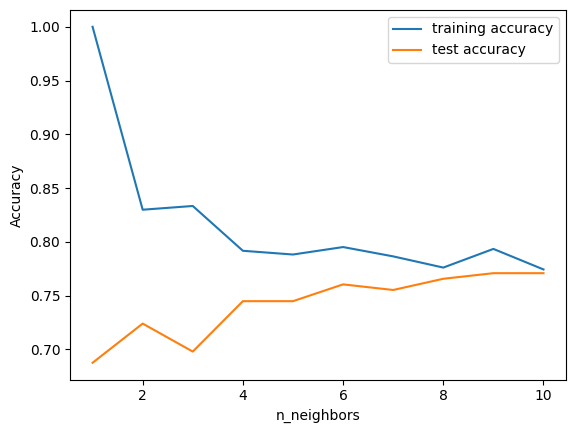

In [23]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [24]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.77


In [25]:
sample = [[0,90,88,44,0,43.3,0.222,26]]
preds = knn.predict(sample)
print("Predictions:", preds)

Predictions: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
sample = [[0,181,88,44,510,43.3,0.222,26]]
preds = knn.predict(sample)
print("Predictions:", preds)

Predictions: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
506,0,180,90,26,90,36.5,0.314,35
709,2,93,64,32,160,38.0,0.674,23
257,2,114,68,22,0,28.7,0.092,25
518,13,76,60,0,0,32.8,0.180,41
432,1,80,74,11,60,30.0,0.527,22


In [ ]:
# making predictions on the testing set
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
print(y_pred)
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

[1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1
 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 1 0 1 0 0]
kNN model accuracy: 0.7708333333333334
[[105  20]
 [ 24  43]]


In [ ]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
y_test

506    1
709    1
257    0
518    0
432    0
      ..
143    1
686    0
681    1
510    1
426    0
Name: Outcome, Length: 192, dtype: int64

In [ ]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
print("True Positives: ",tp)
print("False Positives: ",fp)
#https://www.geeksforgeeks.org/numpy-ravel-python/

True Positives:  105
False Positives:  20


In [ ]:
print("False Negative: ",fn)
print("True Negative: ",tn)


False Negative:  24
True Negative:  43


In [ ]:
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn)
print("Accuracy {:0.2f}%:".format(Accuracy))

Accuracy 77.08%:


In [ ]:
#Precision
Precision = tp/(tp+fp)
print("Precision {:0.2f}".format(Precision))

#ideally fp should be Zero

Precision 0.84


In [ ]:
#Recall
Recall = tp/(tp+fn)
print("Recall {:0.2f}".format(Recall))

Recall 0.81


In [ ]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.83


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.703


In [ ]:
# making predictions on the testing set
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred = tree.predict(X_test)
print(y_pred)
print("Decision tree model accuracy:", metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

[1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1
 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1
 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1
 1 0 1 1 1 0 0]
Decision tree model accuracy: 0.703125
[[91 34]
 [23 44]]


In [ ]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
print("True Positives: ",tp)
print("False Positives: ",fp)

True Positives:  91
False Positives:  34


In [ ]:
print("False Negative: ",fn)
print("True Negative: ",tn)

False Negative:  23
True Negative:  44


In [ ]:
#Precision
Precision = tp/(tp+fp)
print("Precision {:0.2f}".format(Precision))

#ideally fp should be Zero

Precision 0.73


In [ ]:
#Recall
Recall = tp/(tp+fn)
print("Recall {:0.2f}".format(Recall))

Recall 0.80


In [ ]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.76


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.4f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.4f}".format(logreg.score(X_test, y_test)))

Training set score: 0.7795
Test set score: 0.7708


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.771
Test set accuracy: 0.766


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.786
Test set accuracy: 0.776


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.703


In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.771
Accuracy on test set: 0.740


In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.04590074 0.68358047 0.         0.         0.         0.27051879
 0.         0.        ]


In [ ]:
diabetes_features=diabetes.columns

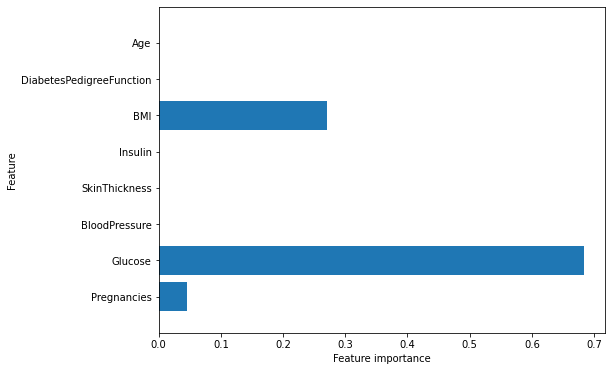

In [ ]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.792


In [ ]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.802
Accuracy on test set: 0.740


In [ ]:
sample = [[0,181,88,44,510,43.3,0.222,26]]
#sample = [[0,90,88,44,0,43.3,0.222,26]]
preds = knn.predict(sample)
print("Predictions:", preds)

Predictions: [1]
